<a href="https://colab.research.google.com/github/ritambharajha/Guidance_System_For_Retaliatory_Violence_Rochester_Using_NetworkAnalysis/blob/main/Individual_Level_NetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Guidance System for Retaliatory Violence in Rochester using Network Analysis </H1>
Advisor: Prof. Irshad Alteimer<br>
Team: Ritambhara Jha, Sreenidhi Sridhar, Carter Brazell

##### This file displays the generation of networks at an individual-level, each individual (if involved in a dispute) being a node. Also, it displays the centrality scores.

In [ ]:
#Mounting the google drive to get access to the dataset.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Updating to latest scipy library
pip install scipy==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [ ]:
#Importing python libraries needed for the network analysis.
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Reading the edge and node files.
file_edge = "/content/drive/Shareddrives/CPSI Capstone Group/Excel_sheets/Edge_UniqueID.xlsx"
file_node = "/content/drive/Shareddrives/CPSI Capstone Group/Excel_sheets/Node_UniqueID.xlsx"
Gang_edges = pd.read_excel(file_edge)
Gang_nodes = pd.read_excel(file_node)

In [ ]:
#Displaying node data
Gang_nodes

,MCAC ID,ID,Names,Suspect,Victim,Witness
0,10-010,1,Aaron Peterson,0.0,0.0,0.0
1,10-004,2,Aaron Radford,0.0,0.0,0.0
2,11-004,3,Aaron Young,0.0,0.0,0.0
3,14-03,4,Abigail Hallowell,0.0,0.0,0.0
4,11-015,5,"Abram Cotton, Jr",0.0,1.0,0.0
...,...,...,...,...,...,...
1379,11-036,1214,Zecheriah Burnett,0.0,0.0,0.0
1380,11-040,1215,Zeke Gross,1.0,0.0,0.0
1381,13-022,1215,Zeke Gross,0.0,0.0,0.0
1382,13-028,1215,Zeke Gross,0.0,0.0,0.0


In [ ]:
#Displaying edge data
Gang_edges

,MCAC ID,ID,Names
0,10-010,1,Aaron Peterson
1,10-004,2,Aaron Radford
2,11-004,3,Aaron Young
3,14-03,4,Abigail Hallowell
4,11-015,5,"Abram Cotton, Jr"
...,...,...,...
1379,11-036,1214,Zecheriah Burnett
1380,11-040,1215,Zeke Gross
1381,13-022,1215,Zeke Gross
1382,13-028,1215,Zeke Gross


In [ ]:
#Populating Graphs
G = nx.Graph()
dispute_dict = {} 

for index, row in Gang_nodes.iterrows():
  MCAC_ID = row['MCAC ID']
  ID = int(row['ID'])
  name = row['Names']
  # print(MCAC_ID, ID, name)

  if ID not in G:
    G.add_node(ID, MCAC_ID=MCAC_ID, ID=ID, name=name)

  if MCAC_ID not in dispute_dict:
    dispute_dict[MCAC_ID] = [ID]
  else:
    dispute_dict[MCAC_ID].append(ID)

self_loops = False

for MCAC_ID in dispute_dict:
  IDs = dispute_dict[MCAC_ID]
  edges = [(IDs[i], IDs[j], {'MCAC ID':MCAC_ID}) for i in range(len(IDs)) for j in range(i+(1-int(self_loops)),len(IDs))]
  G.add_edges_from(edges)
  

In [ ]:
#Displaying node attributes.
for node in G.nodes(data=True):
  print(node)

(1, {'MCAC_ID': '10-010', 'ID': 1, 'name': 'Aaron Peterson'})
(2, {'MCAC_ID': '10-004', 'ID': 2, 'name': 'Aaron Radford'})
(3, {'MCAC_ID': '11-004', 'ID': 3, 'name': 'Aaron Young'})
(4, {'MCAC_ID': '14-03', 'ID': 4, 'name': 'Abigail Hallowell'})
(5, {'MCAC_ID': '11-015', 'ID': 5, 'name': 'Abram Cotton, Jr'})
(6, {'MCAC_ID': '11-015', 'ID': 6, 'name': 'Abram Cotton, Sr'})
(7, {'MCAC_ID': '10-033', 'ID': 7, 'name': 'Adam Bowen'})
(8, {'MCAC_ID': '13-031', 'ID': 8, 'name': 'Aiyesha Pendleton'})
(9, {'MCAC_ID': '13-003', 'ID': 9, 'name': 'Ajanaye Crumity'})
(10, {'MCAC_ID': '13-028', 'ID': 10, 'name': 'Akai Phillips'})
(11, {'MCAC_ID': '12-014', 'ID': 11, 'name': 'Al Oliver'})
(12, {'MCAC_ID': '10-033', 'ID': 12, 'name': 'Al’Tarique Mitchell'})
(13, {'MCAC_ID': '10-010', 'ID': 13, 'name': 'Alante Dees'})
(14, {'MCAC_ID': '11-012', 'ID': 14, 'name': 'Albert King'})
(15, {'MCAC_ID': '11-014', 'ID': 15, 'name': 'Albert Ross Simmons'})
(16, {'MCAC_ID': '12-011', 'ID': 16, 'name': 'Alesia Smith

In [ ]:
#Displaying edge attributes.
for edge in G.edges(data=True):
  print(edge)

Streaming output truncated to the last 5000 lines.
(369, 722, {'MCAC ID': '11-040'})
(369, 740, {'MCAC ID': '11-040'})
(369, 753, {'MCAC ID': '11-040'})
(369, 832, {'MCAC ID': '11-040'})
(369, 833, {'MCAC ID': '11-040'})
(369, 854, {'MCAC ID': '11-040'})
(369, 881, {'MCAC ID': '11-040'})
(369, 891, {'MCAC ID': '11-040'})
(369, 896, {'MCAC ID': '11-040'})
(369, 925, {'MCAC ID': '11-040'})
(369, 964, {'MCAC ID': '11-040'})
(369, 1001, {'MCAC ID': '11-040'})
(369, 1006, {'MCAC ID': '11-040'})
(369, 1019, {'MCAC ID': '11-040'})
(369, 1034, {'MCAC ID': '11-040'})
(369, 1072, {'MCAC ID': '11-040'})
(369, 1105, {'MCAC ID': '11-040'})
(369, 1145, {'MCAC ID': '11-040'})
(369, 1159, {'MCAC ID': '11-040'})
(369, 1178, {'MCAC ID': '11-040'})
(369, 1184, {'MCAC ID': '11-040'})
(369, 1215, {'MCAC ID': '11-040'})
(370, 377, {'MCAC ID': '11-040'})
(370, 415, {'MCAC ID': '11-040'})
(370, 416, {'MCAC ID': '11-040'})
(370, 433, {'MCAC ID': '11-040'})
(370, 490, {'MCAC ID': '11-040'})
(370, 498, {'MCAC ID

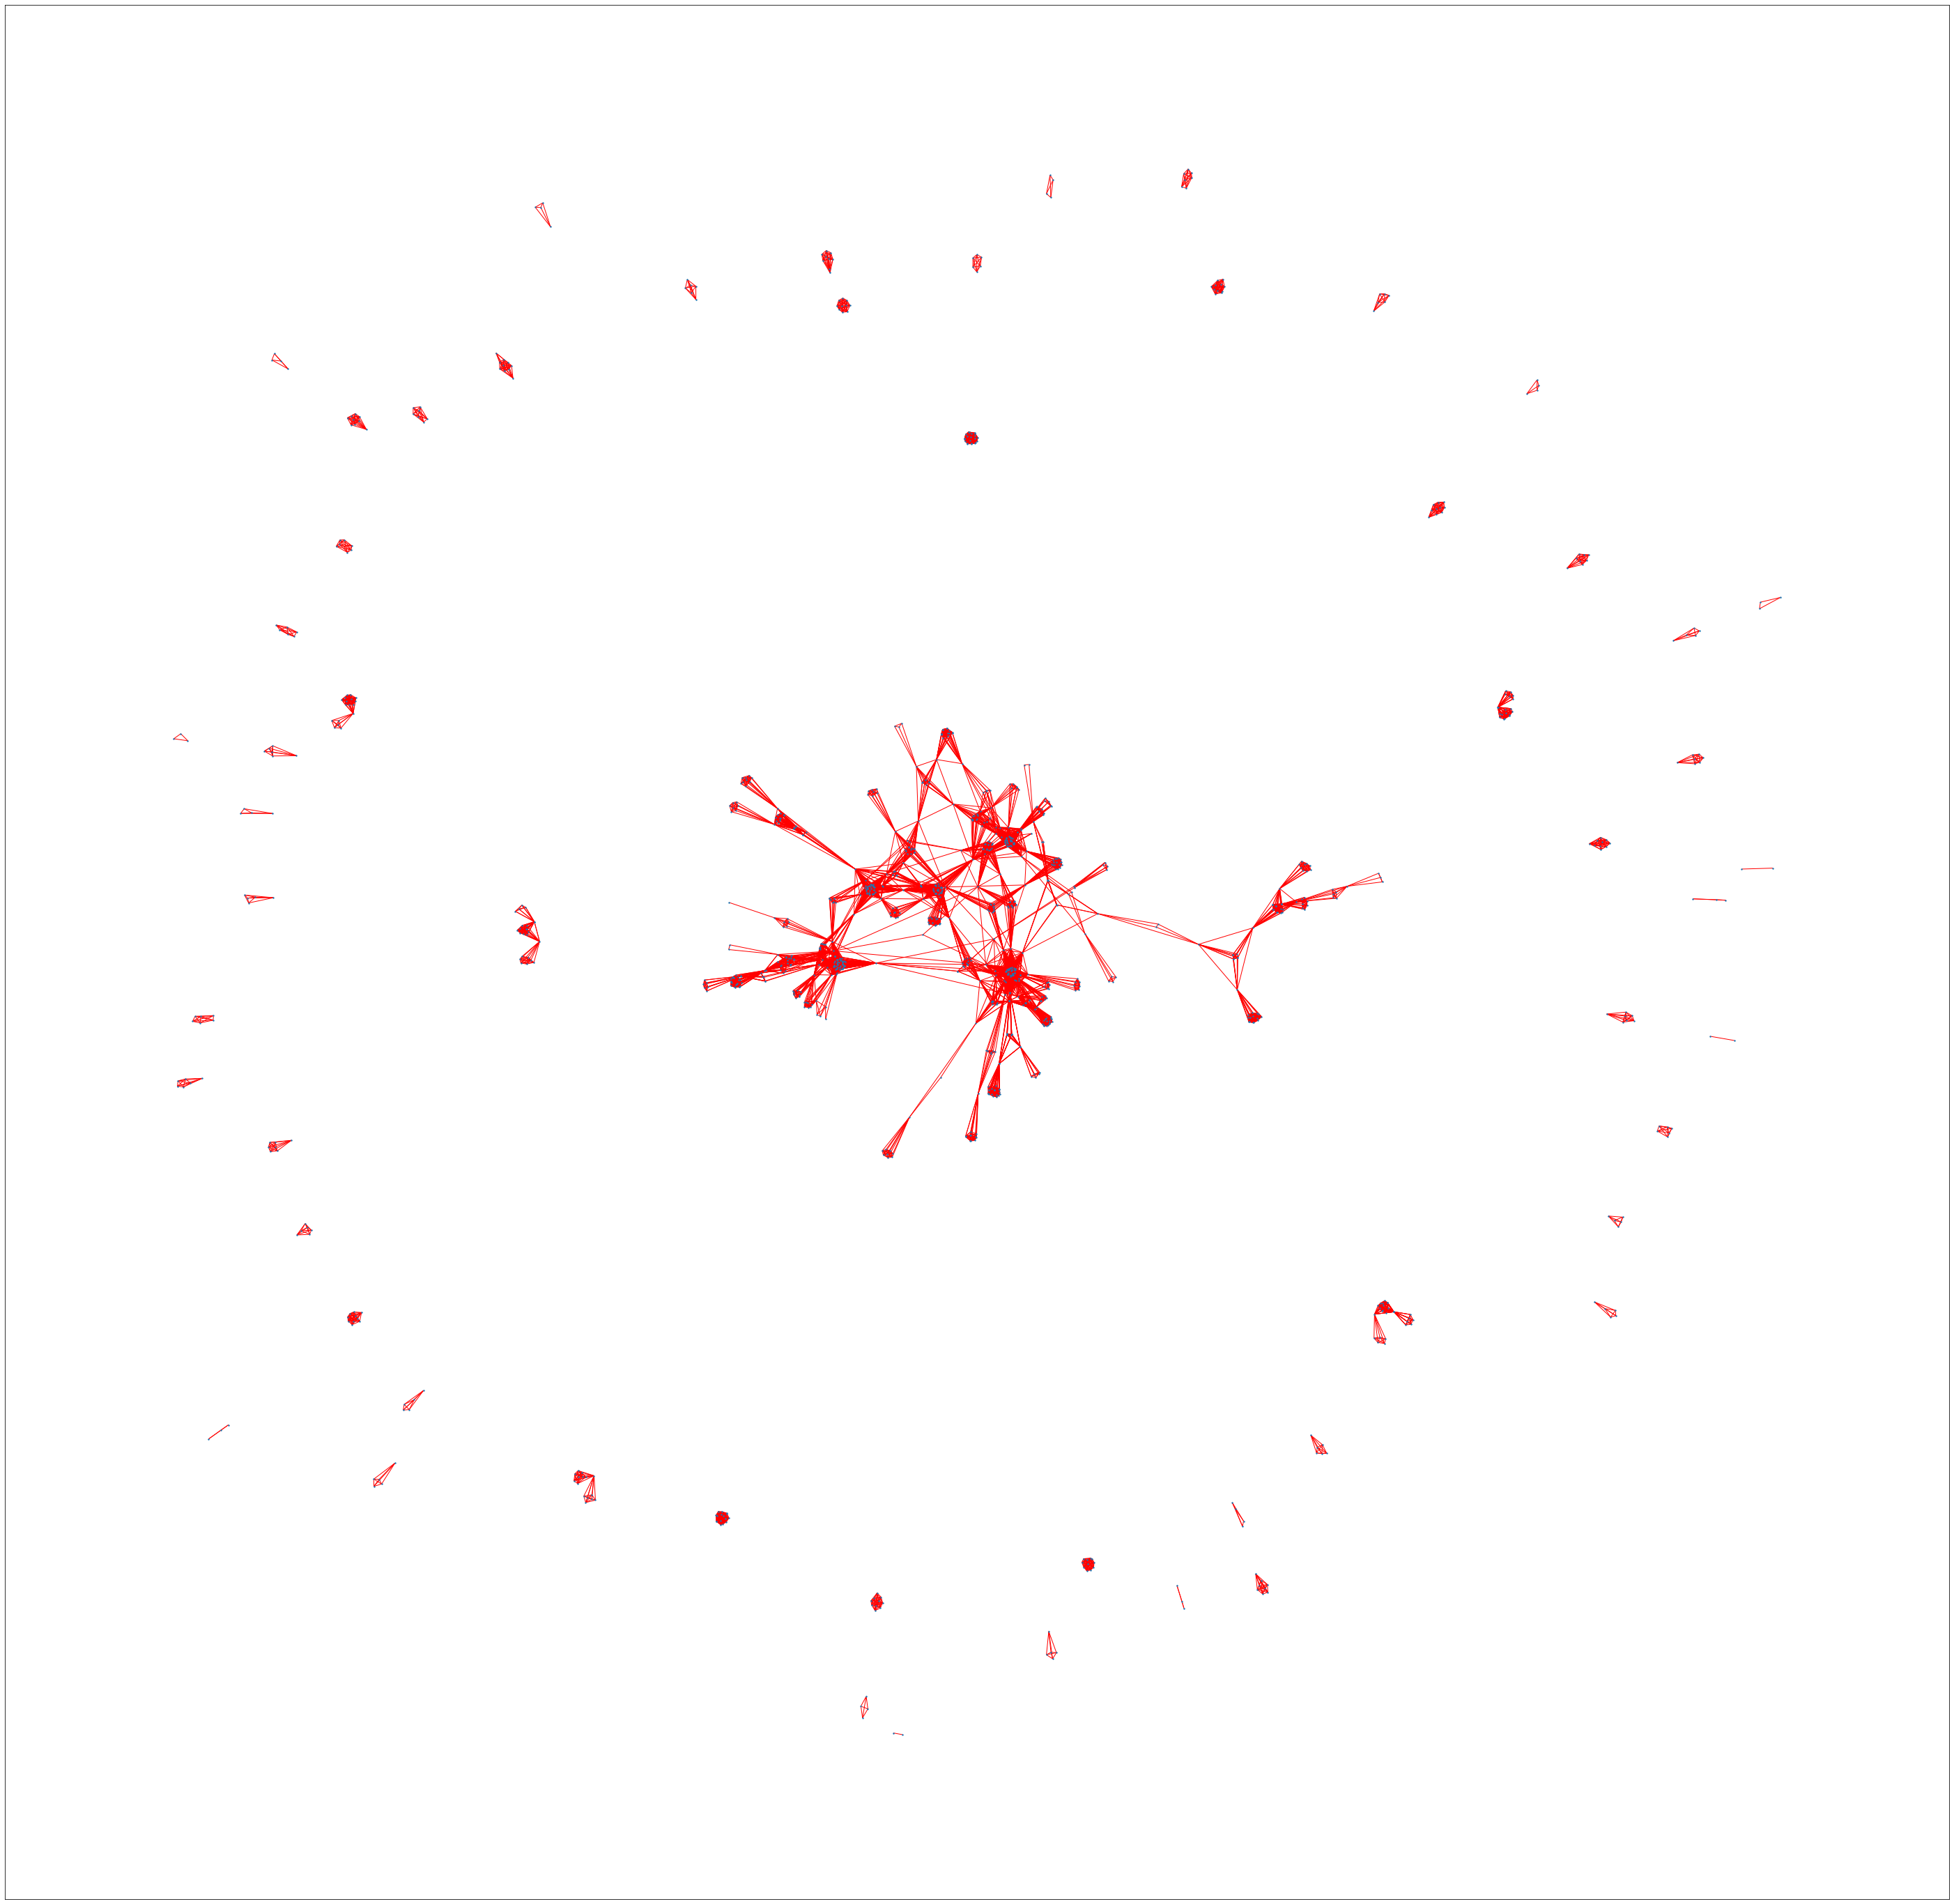

In [ ]:
#Plotting general network with spring layout.
pos = nx.spring_layout(G) #positions for all nodes
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=2)
# nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Initial_network.png", formant="PNG", dpi=300)
plt.show()

In [ ]:
Coeff=nx.clustering(G)
print(Coeff)

{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 0.6164383561643836, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 0.5001851166234728, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 0.5, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 0.7731694828469022, 43: 1.0, 44: 1.0, 45: 1.0, 46: 0.6259426847662142, 47: 0.5333333333333333, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 0.8011695906432749, 54: 1.0, 55: 0.6865671641791045, 56: 0.6649048625792812, 57: 1.0, 58: 1.0, 59: 1.0, 60: 1.0, 61: 1.0, 62: 1.0, 63: 1.0, 64: 1.0, 65: 1.0, 66: 1.0, 67: 1.0, 68: 1.0, 69: 1.0, 70: 1.0, 71: 1.0, 72: 1.0, 73: 1.0, 74: 0.7142857142857143, 75: 1.0, 76: 1.0, 77: 1.0, 78: 1.0, 79: 1.0, 80: 1.0, 81: 1.0, 82: 1.0, 83: 1.0, 84: 1.0, 85: 1.0, 86: 0.5833333333333334, 87: 1.0, 88: 1.0, 89: 1.0, 90: 1.0, 91: 1.0, 92: 1.0, 93: 0.8888888888888888, 94: 1.

In [ ]:
#Clustering Coefficient
#Copying the values to an excel sheet
#data_betCent = [nx.clustering(G)]
df_betCent = pd.DataFrame(data=Coeff, index=[1])
df_betCent = (df_betCent.T)
df_betCent.to_excel("/content/drive/Shareddrives/CPSI Capstone Group/Clustering_coeff.xlsx")

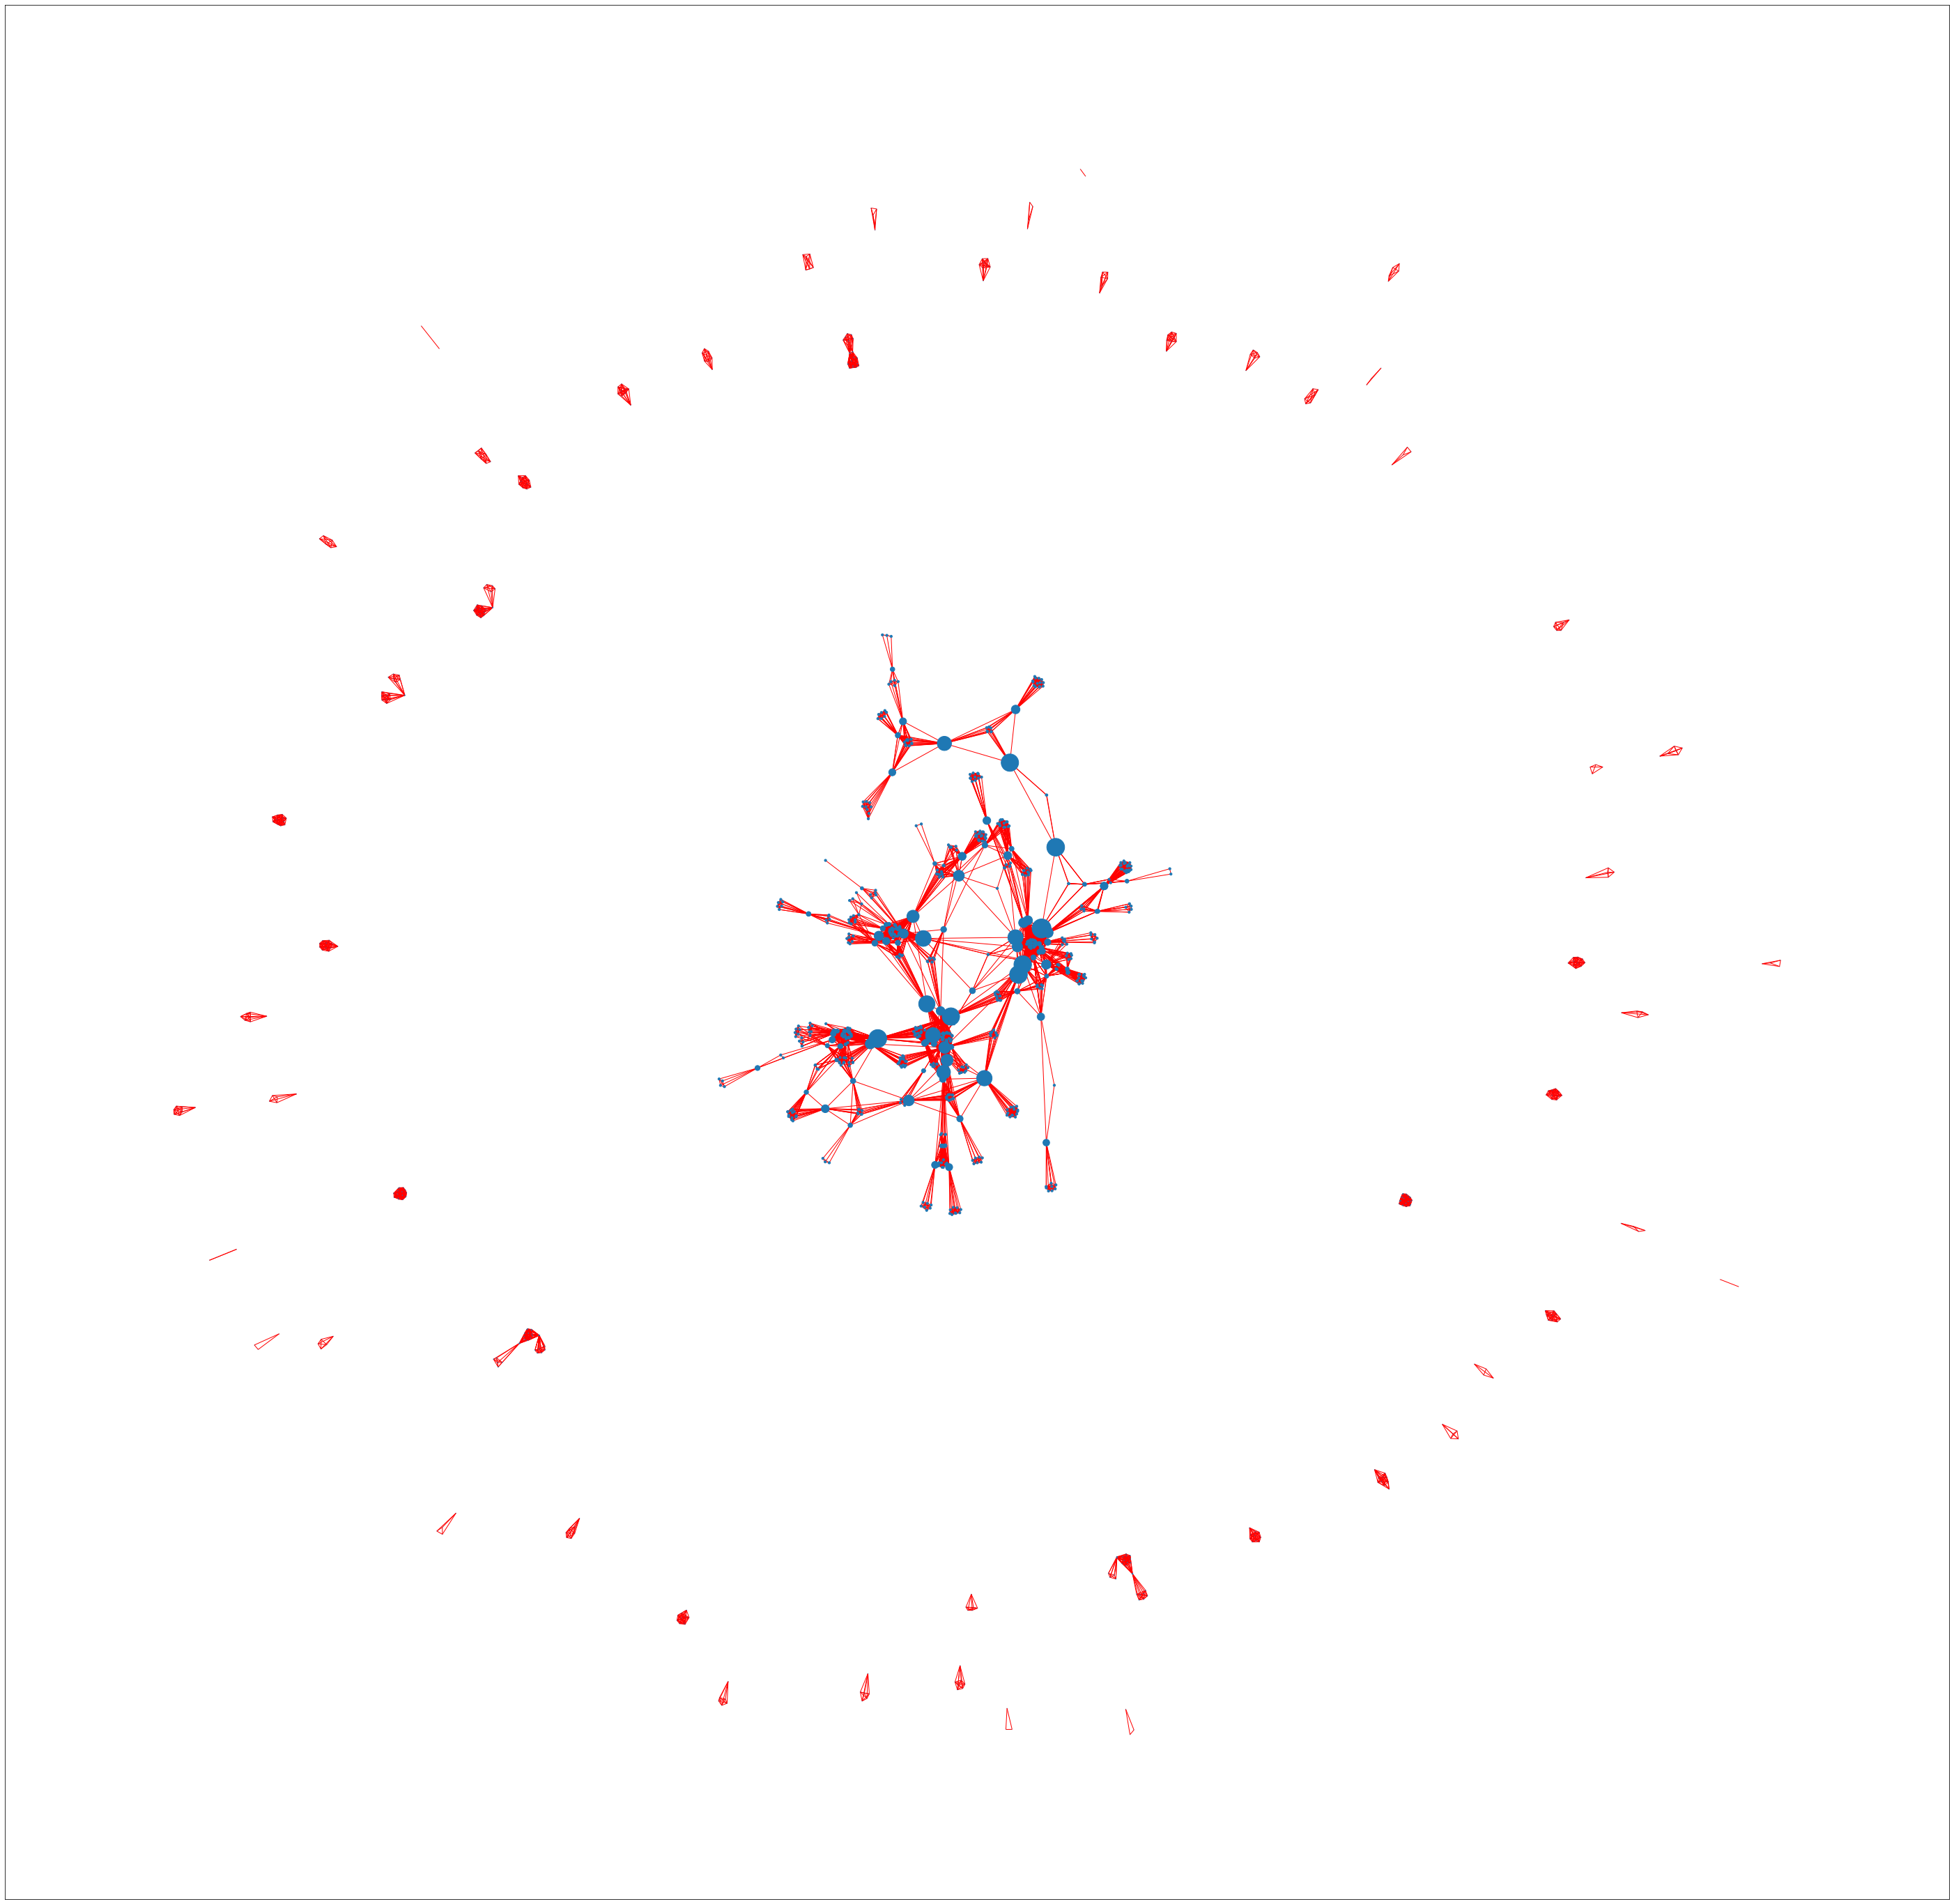

In [ ]:
#Betweeness Centrality
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betCent.values()]
pos = nx.spring_layout(G) #positions for all nodes
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Betweeness.png", formant="PNG", dpi=300)
plt.show()

In [ ]:
#len(betCent.values())

In [ ]:
#betCent.values()

In [ ]:
#Printing node and their respective betweenness centrality value
print([f"{node} {betCent[node]:f}" for node in betCent])

['1 0.001045', '2 0.000003', '3 0.001045', '4 0.000014', '5 0.000035', '6 0.000035', '7 0.007088', '8 0.000009', '9 0.001045', '10 0.001045', '11 0.001045', '12 0.001045', '13 0.045649', '14 0.000007', '15 0.001045', '16 0.000007', '17 0.001045', '18 0.001045', '19 0.000007', '20 0.004168', '21 0.000007', '22 0.000003', '23 0.001045', '24 0.001045', '25 0.000014', '26 0.001045', '27 0.000019', '28 0.000005', '29 0.000012', '30 0.001045', '31 0.001045', '32 0.001045', '33 0.000003', '34 0.001045', '35 0.000012', '36 0.000028', '37 0.001045', '38 0.000026', '39 0.001045', '40 0.000004', '41 0.001045', '42 0.047695', '43 0.001045', '44 0.001045', '45 0.001045', '46 0.006032', '47 0.001057', '48 0.000020', '49 0.000028', '50 0.000005', '51 0.000019', '52 0.000005', '53 0.003130', '54 0.000004', '55 0.017358', '56 0.006973', '57 0.001045', '58 0.001045', '59 0.001045', '60 0.000008', '61 0.000008', '62 0.001045', '63 0.001045', '64 0.001045', '65 0.000012', '66 0.001045', '67 0.001045', '68

In [ ]:
#Copying the values to an excel sheet
data_betCent = [f"{node} {betCent[node]:f}" for node in betCent]
df_betCent = pd.DataFrame(data_betCent, columns=['Score'])
df_betCent.to_excel("/content/drive/Shareddrives/CPSI Capstone Group/betCent_Scores.xlsx")

In [ ]:
#sorted(betCent, key=betCent.get, reverse=True)

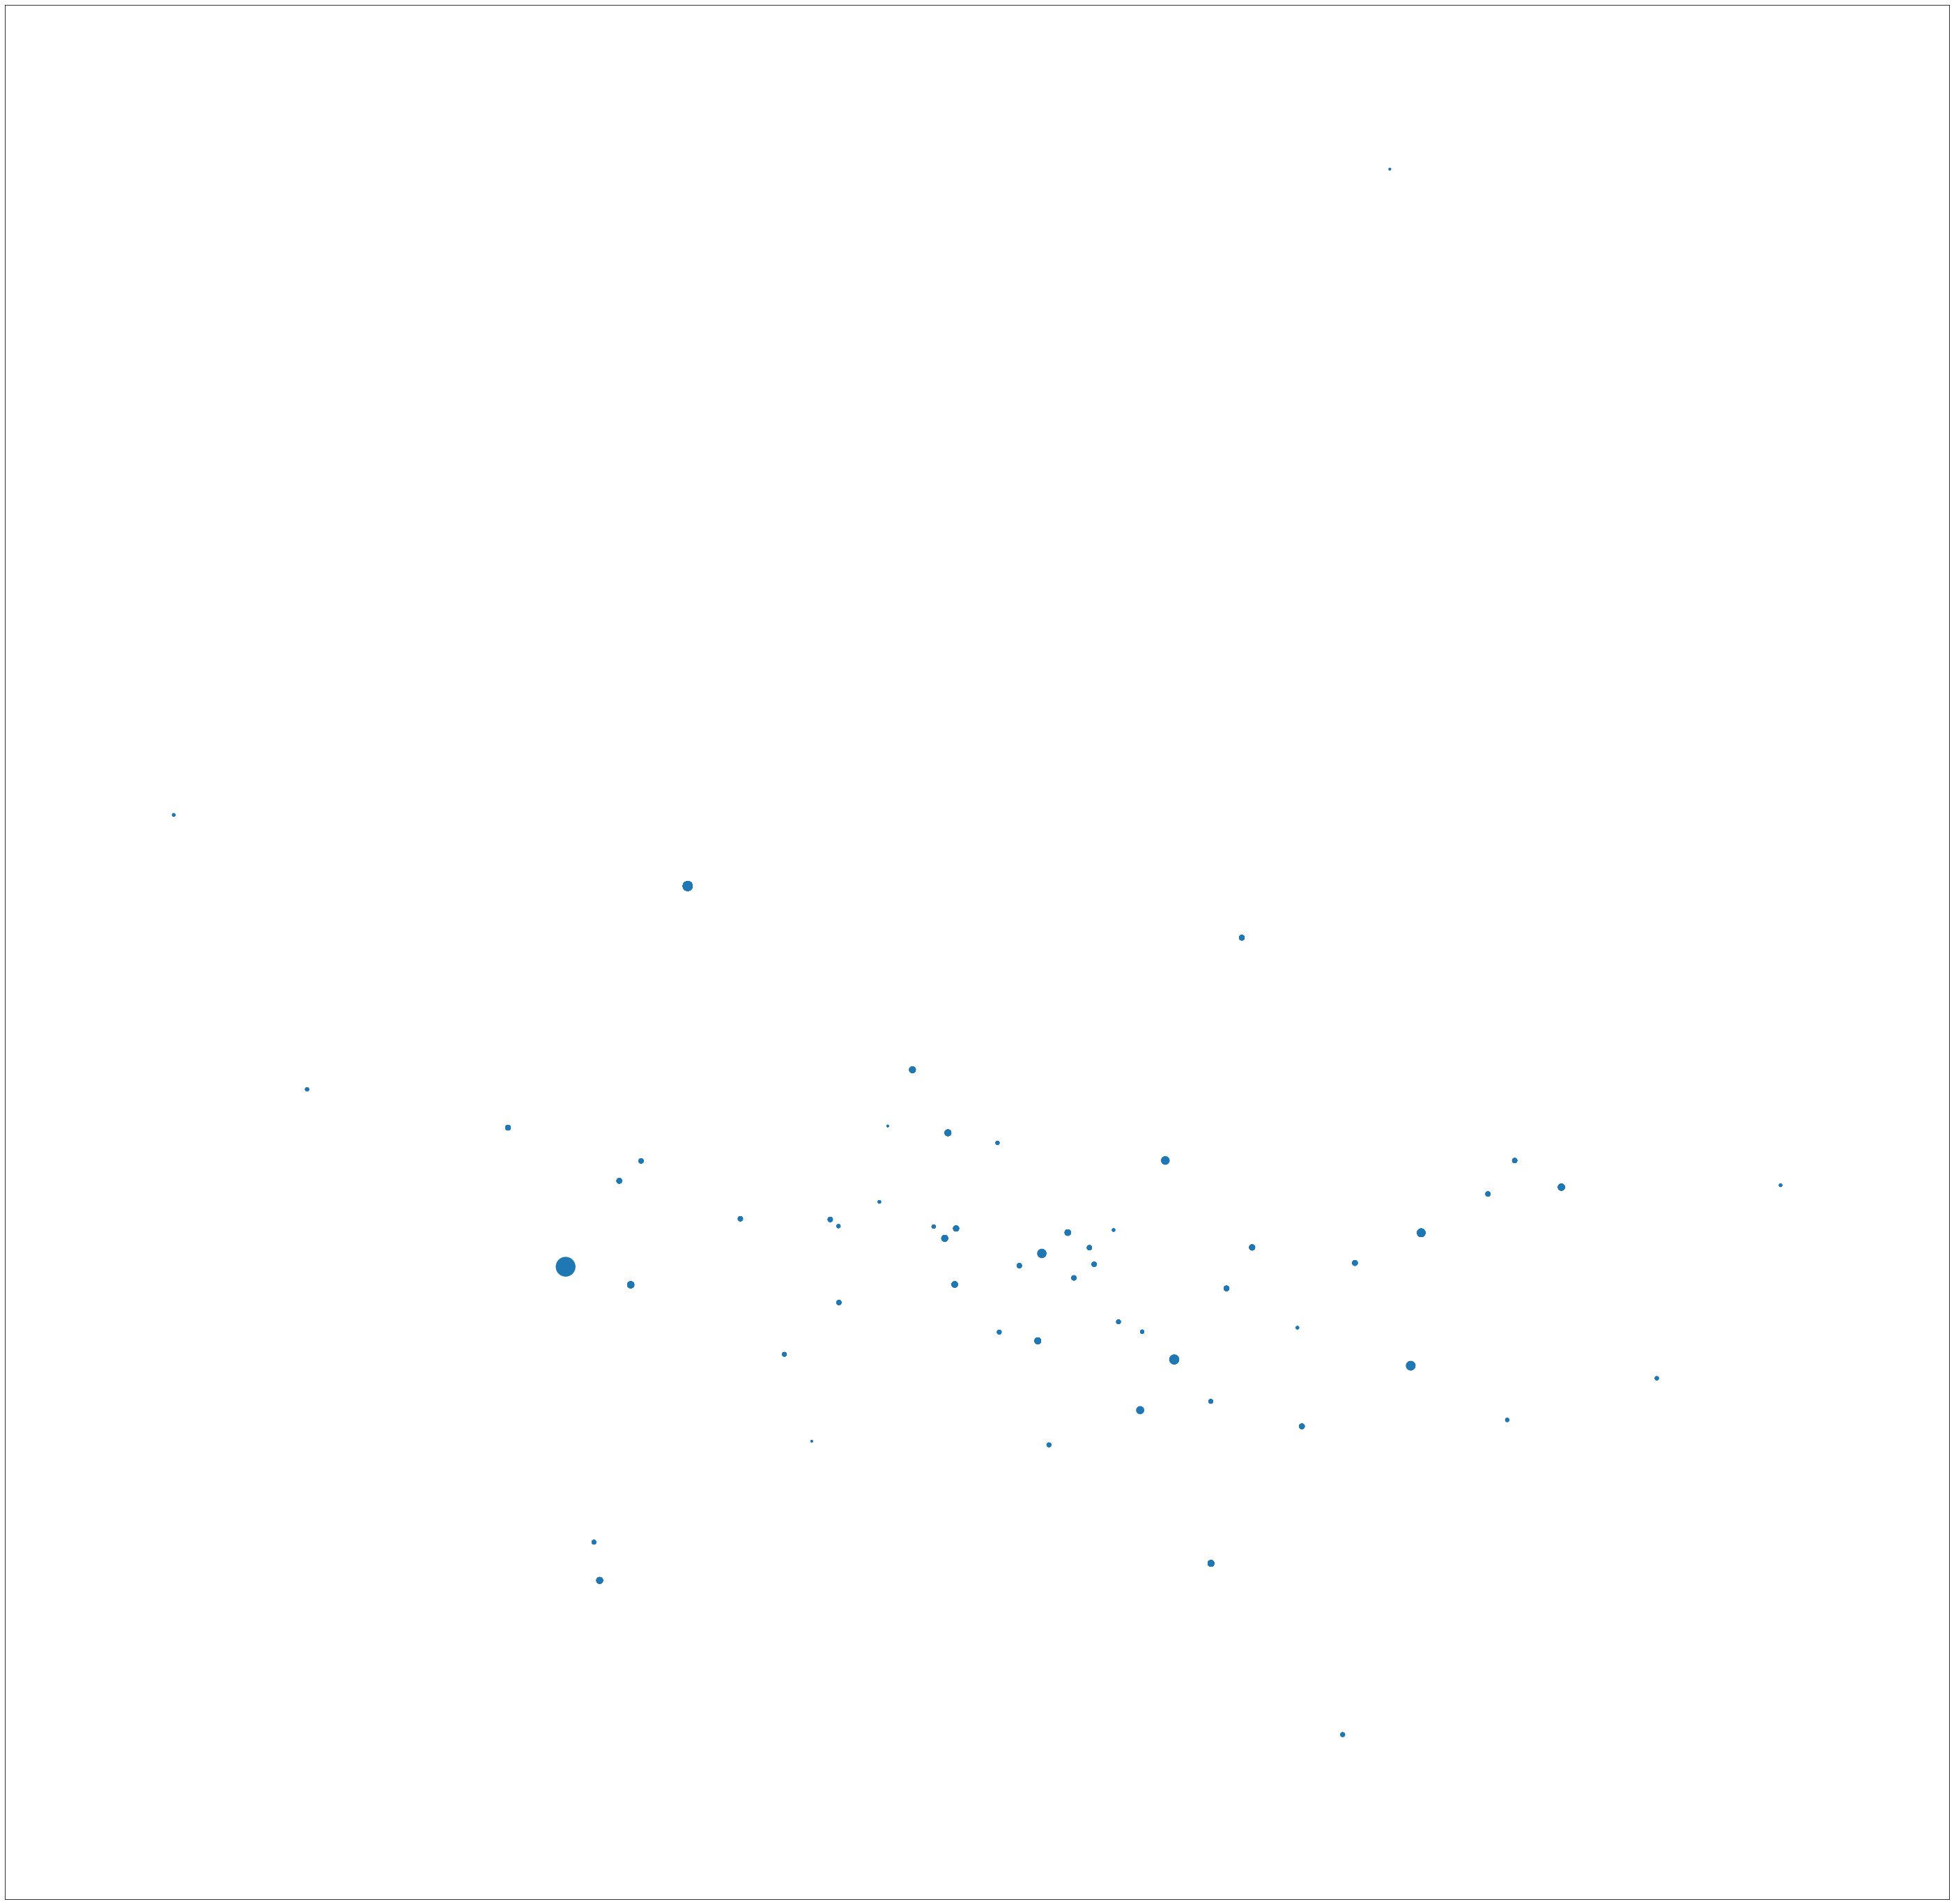

In [ ]:
#Degree Centrality
pos = nx.spectral_layout(G)
degCent = nx.degree_centrality(G)
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Degree.png", formant="PNG", dpi=300) 
plt.show()

In [ ]:
#Printing node and their respective degree centrality value
print([f"{node} {degCent[node]:f}" for node in degCent])

['1 0.032922', '2 0.001646', '3 0.032922', '4 0.008230', '5 0.012346', '6 0.012346', '7 0.060082', '8 0.005761', '9 0.007407', '10 0.012346', '11 0.011523', '12 0.045267', '13 0.060905', '14 0.004115', '15 0.002469', '16 0.004115', '17 0.032922', '18 0.012346', '19 0.004115', '20 0.007407', '21 0.004115', '22 0.001646', '23 0.045267', '24 0.009053', '25 0.008230', '26 0.007407', '27 0.004938', '28 0.003292', '29 0.007407', '30 0.007407', '31 0.009053', '32 0.001646', '33 0.001646', '34 0.013169', '35 0.007407', '36 0.017284', '37 0.004115', '38 0.006584', '39 0.008230', '40 0.002469', '41 0.007407', '42 0.051852', '43 0.005761', '44 0.018107', '45 0.007407', '46 0.042798', '47 0.004938', '48 0.012346', '49 0.017284', '50 0.003292', '51 0.006584', '52 0.003292', '53 0.015638', '54 0.002469', '55 0.055967', '56 0.036214', '57 0.005761', '58 0.013169', '59 0.004115', '60 0.004938', '61 0.004938', '62 0.013169', '63 0.006584', '64 0.032922', '65 0.007407', '66 0.011523', '67 0.004115', '68

In [ ]:
#Copying the values to an excel sheet
data_degCent = [f"{node} {degCent[node]:f}" for node in degCent]
df_degCent = pd.DataFrame(data_degCent, columns=['Score'])
df_degCent.to_excel("/content/drive/Shareddrives/CPSI Capstone Group/degCent_scores.xlsx")

In [ ]:
#sorted(degCent, key=degCent.get, reverse=True)

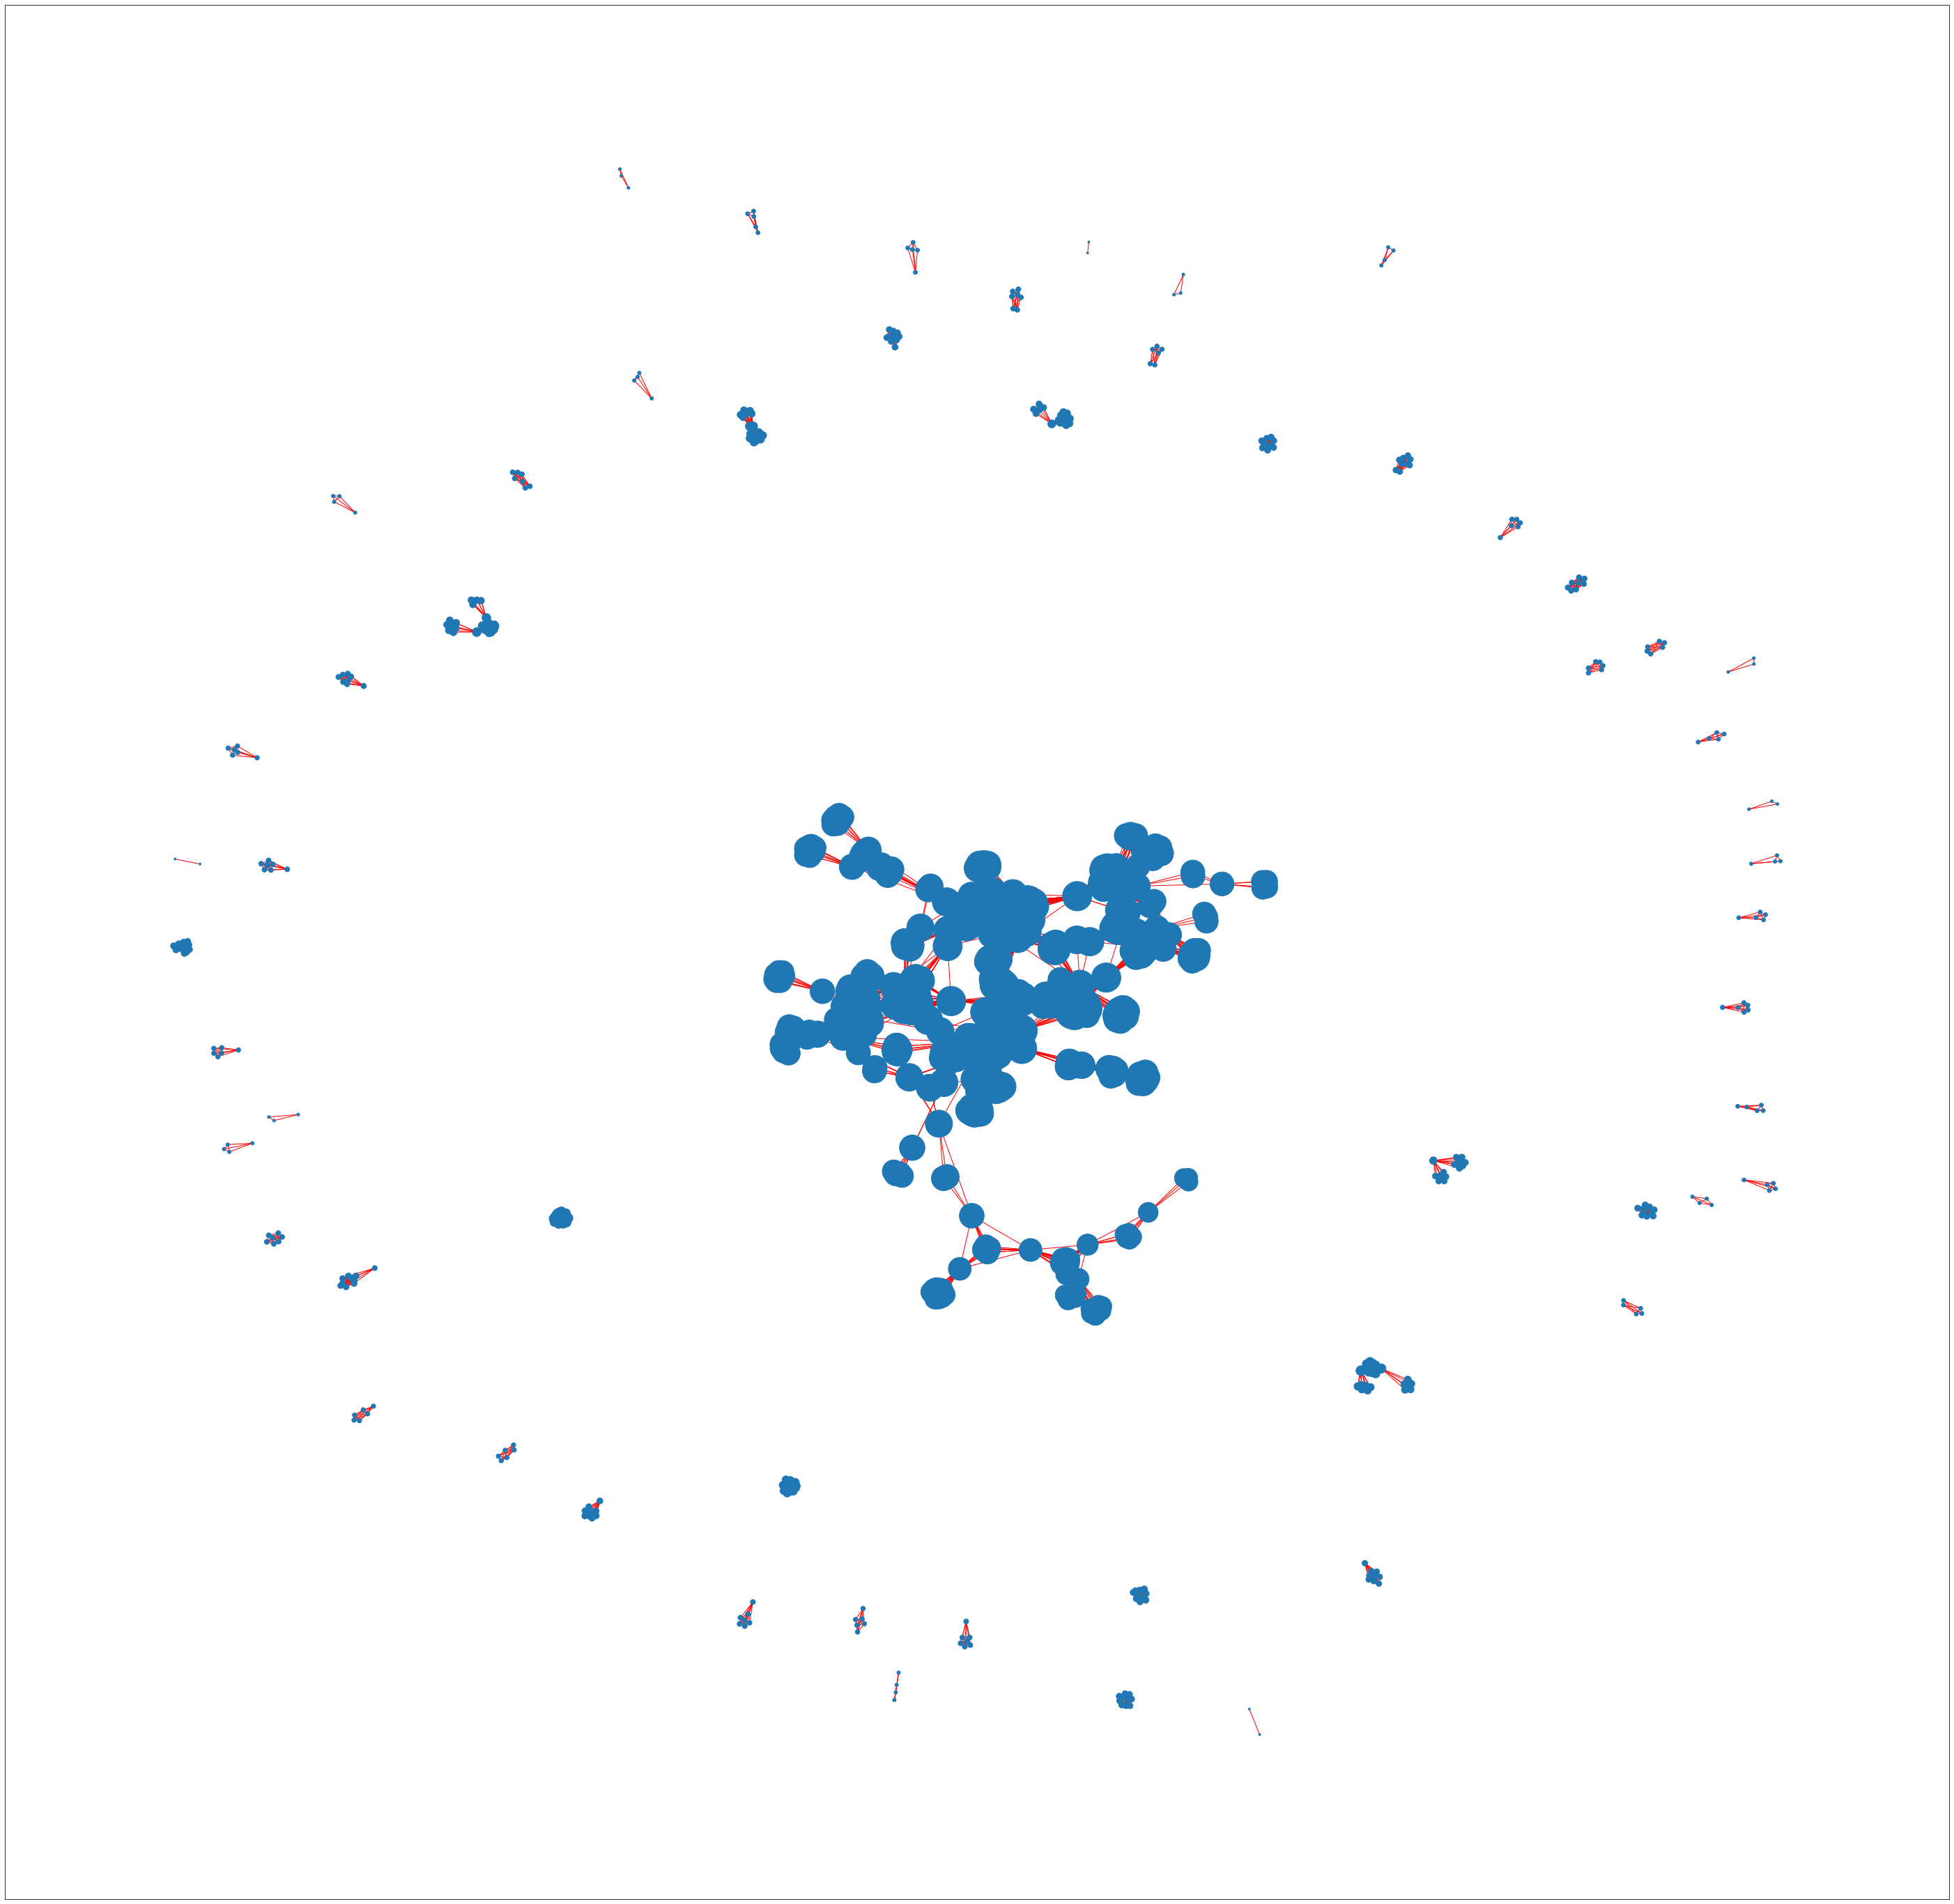

In [ ]:
#Closeness Centrality
pos = nx.spring_layout(G)
cloCent = nx.closeness_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Closeness.png", formant="PNG", dpi=300)
plt.show()

In [ ]:
#Printing node and their respective closeness centrality value
print([f"{node} {cloCent[node]:f}" for node in cloCent])

['1 0.163127', '2 0.001646', '3 0.144017', '4 0.008230', '5 0.015037', '6 0.015037', '7 0.185733', '8 0.005761', '9 0.150513', '10 0.155425', '11 0.142221', '12 0.183373', '13 0.188084', '14 0.004115', '15 0.113520', '16 0.004115', '17 0.144017', '18 0.110627', '19 0.004115', '20 0.081563', '21 0.004115', '22 0.001646', '23 0.183373', '24 0.117886', '25 0.008230', '26 0.137440', '27 0.007333', '28 0.003292', '29 0.007407', '30 0.110279', '31 0.132789', '32 0.101789', '33 0.001646', '34 0.160616', '35 0.007407', '36 0.017284', '37 0.108379', '38 0.009904', '39 0.137981', '40 0.002469', '41 0.150513', '42 0.198672', '43 0.110428', '44 0.119552', '45 0.137363', '46 0.144526', '47 0.127012', '48 0.012346', '49 0.017284', '50 0.003292', '51 0.008066', '52 0.003292', '53 0.153913', '54 0.002469', '55 0.185593', '56 0.174315', '57 0.128678', '58 0.160616', '59 0.108379', '60 0.004938', '61 0.004938', '62 0.093202', '63 0.081482', '64 0.163127', '65 0.007407', '66 0.092255', '67 0.117575', '68

In [ ]:
#Copying the values to an excel sheet
data_cloCent = [f"{node} {cloCent[node]:f}" for node in cloCent]
df_cloCent = pd.DataFrame(data_cloCent, columns=['Score'])
df_cloCent.to_excel("/content/drive/Shareddrives/CPSI Capstone Group/cloCent_scores.xlsx")

In [ ]:
# sorted(cloCent, key=cloCent.get, reverse=True)

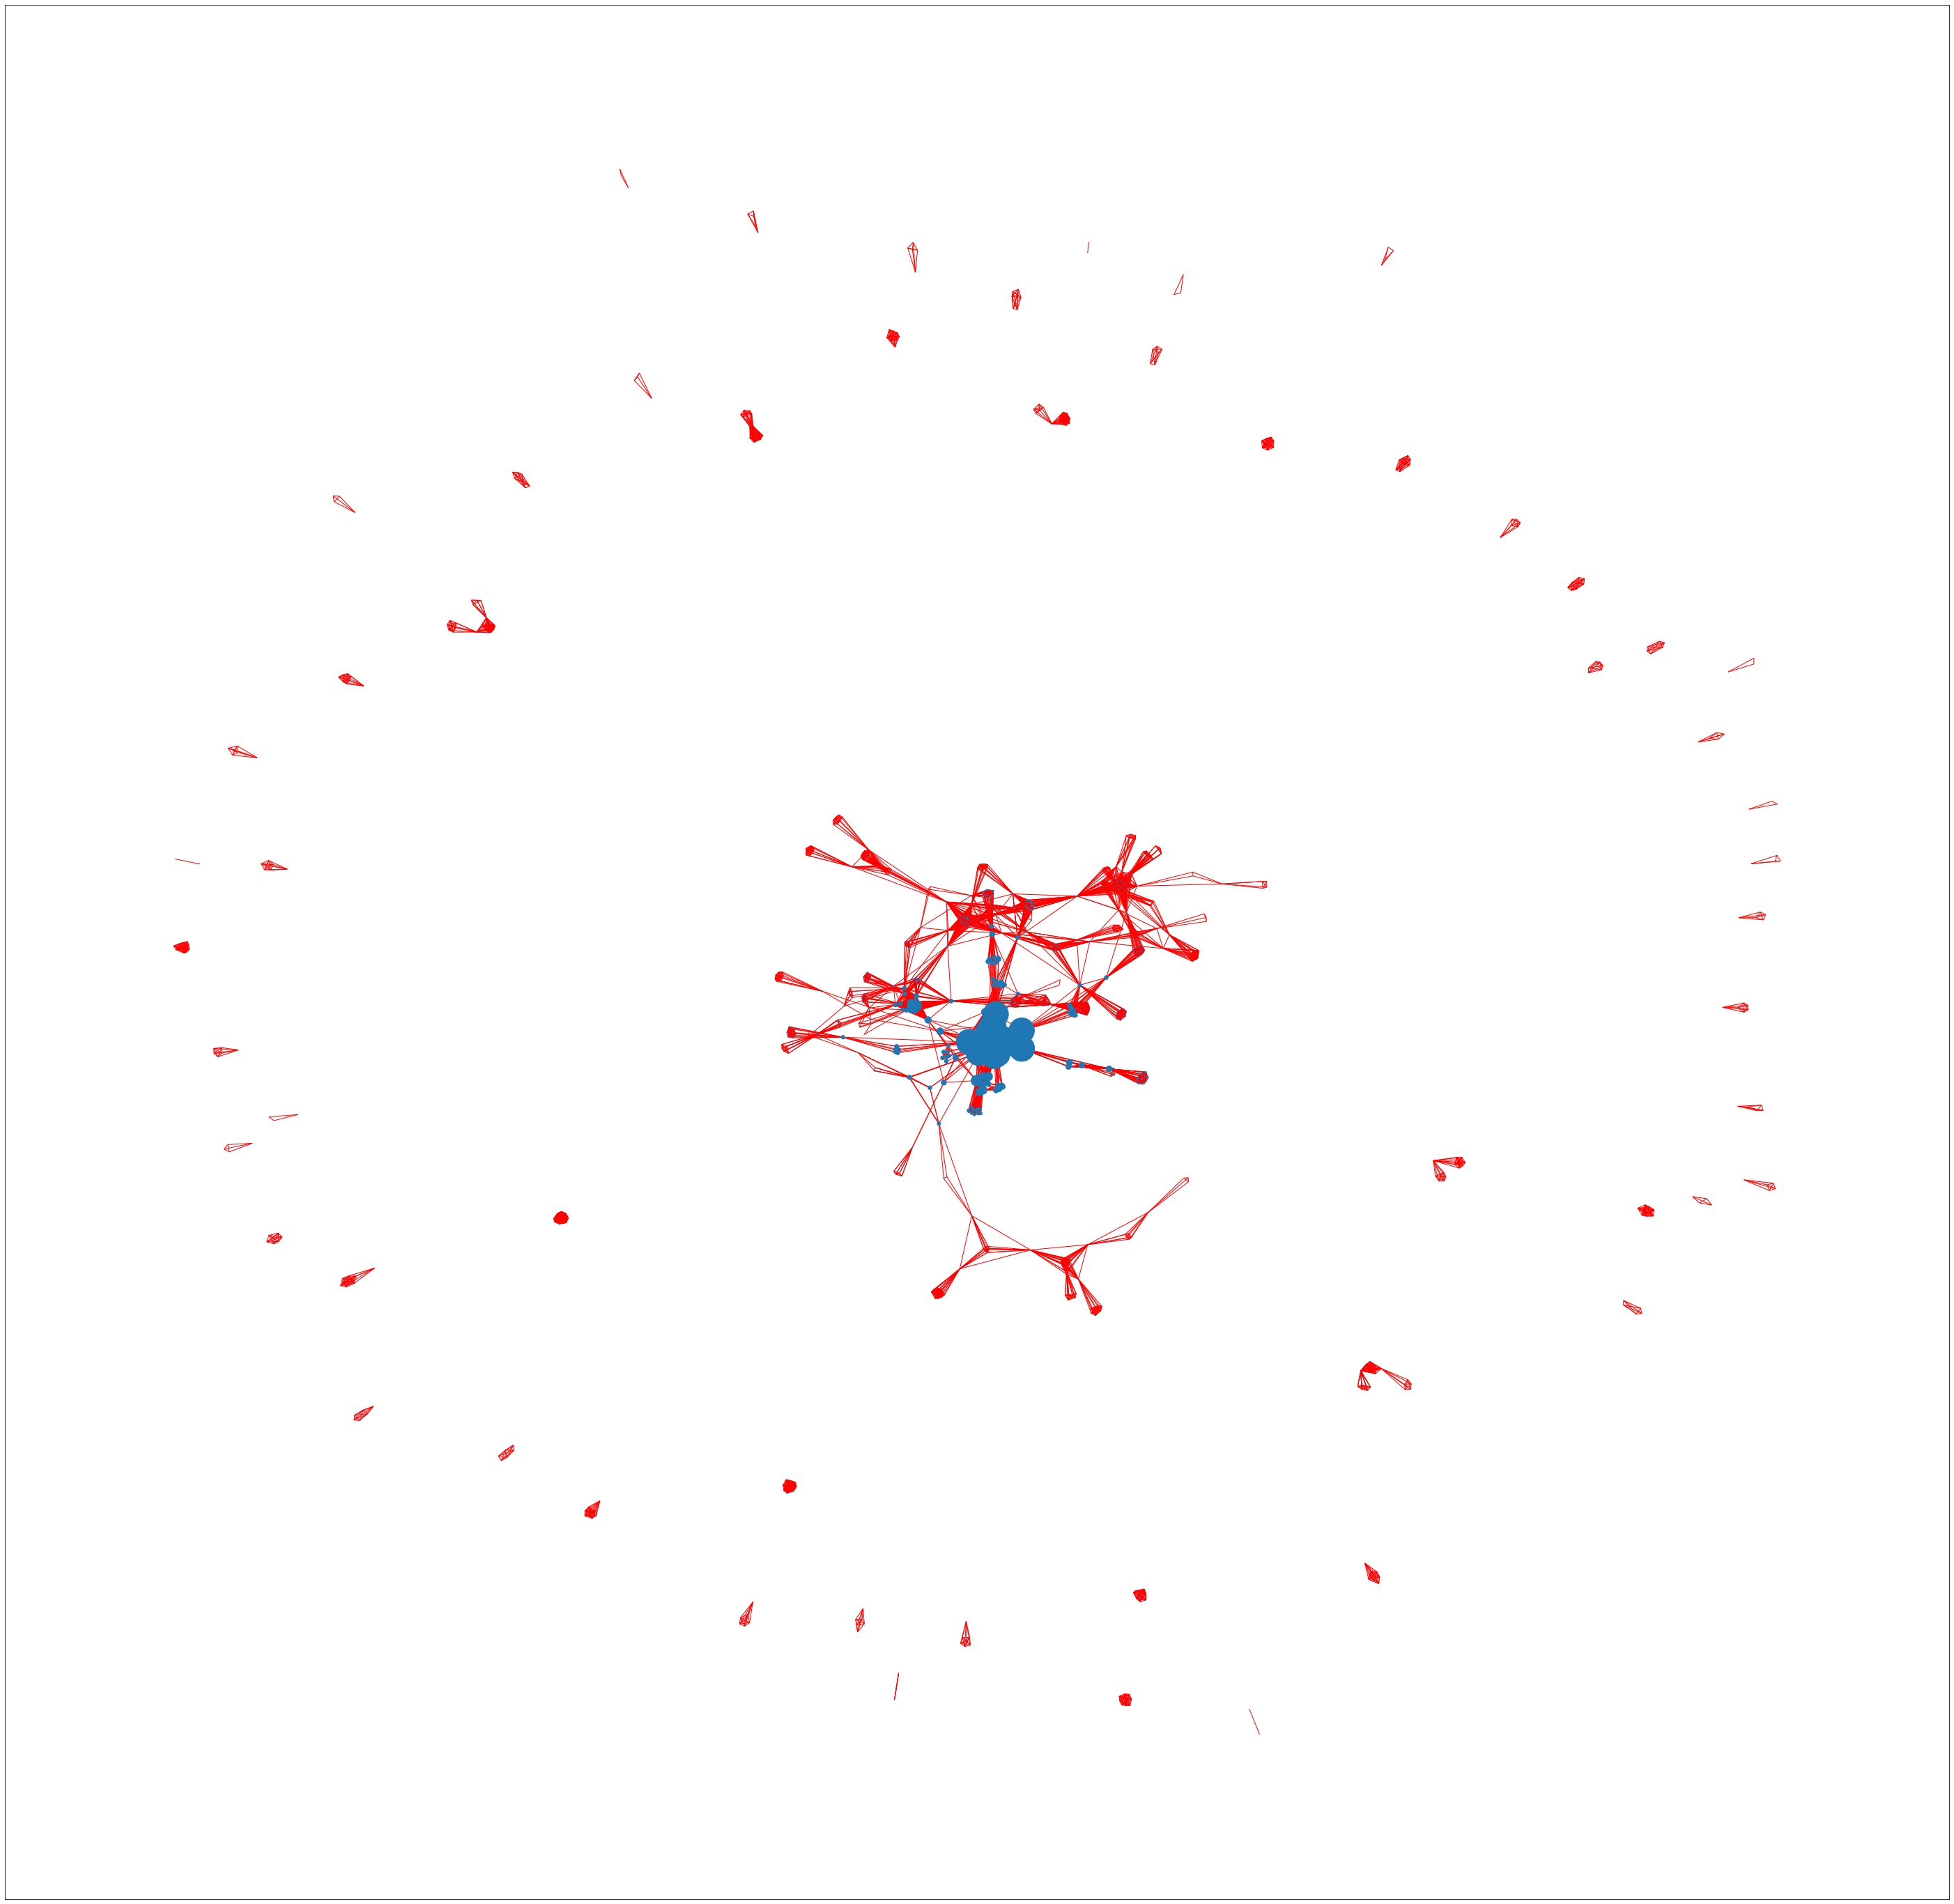

In [ ]:
#Eigen Vector Centrality
eigCent = nx.eigenvector_centrality(G, max_iter=500)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(50,50))
nx.draw_networkx_edges(G,pos, width=1,edge_color='red')
nx.draw_networkx_nodes(G,pos,node_size=node_size)
#nx.draw_networkx_labels(G,pos=pos) #to label the nodes with Id
plt.savefig("Eigen.png", formant="PNG", dpi=300) 
plt.show()

In [ ]:
#Printing node and their respective Eigen Vector centrality value
print([f"{node} {eigCent[node]:f}" for node in eigCent])

['1 0.000052', '2 0.000000', '3 0.000016', '4 0.000000', '5 0.000000', '6 0.000000', '7 0.136231', '8 0.000000', '9 0.006134', '10 0.000445', '11 0.000005', '12 0.132789', '13 0.000206', '14 0.000000', '15 0.000000', '16 0.000000', '17 0.000016', '18 0.000000', '19 0.000000', '20 0.000000', '21 0.000000', '22 0.000000', '23 0.132789', '24 0.000060', '25 0.000000', '26 0.000082', '27 0.000000', '28 0.000000', '29 0.000000', '30 0.000000', '31 0.000001', '32 0.000003', '33 0.000000', '34 0.000080', '35 0.000000', '36 0.000000', '37 0.000004', '38 0.000000', '39 0.000002', '40 0.000000', '41 0.006134', '42 0.133870', '43 0.000000', '44 0.000337', '45 0.000063', '46 0.000016', '47 0.000126', '48 0.000000', '49 0.000000', '50 0.000000', '51 0.000000', '52 0.000000', '53 0.000154', '54 0.000000', '55 0.133564', '56 0.000164', '57 0.000002', '58 0.000080', '59 0.000004', '60 0.000000', '61 0.000000', '62 0.000000', '63 0.000000', '64 0.000052', '65 0.000000', '66 0.000000', '67 0.000001', '68

In [ ]:
#Copying the values to an excel sheet
data_eigCent = [f"{node} {eigCent[node]:f}" for node in eigCent]
df_eigCent = pd.DataFrame(data_eigCent, columns=['Score'])
df_eigCent.to_excel("/content/drive/Shareddrives/CPSI Capstone Group/eigCent_scores.xlsx")

In [ ]:
# sorted(eigCent, key=eigCent.get, reverse=True)

We have collected the data from Rochester Police Department. Here we have populated a general network and calculated the centrality scores for all the data points.<br>
In the future we will be working on the modeling and prediction phase. With the help of the collected matrix we will construct an appropriate model to identify the perpetrator of the violence in the test set.